In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\DELL\Desktop\titanic projet\Titanic-Dataset.csv")

In [9]:
# Data types and non-null values
print(df.info())      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
# Summary statistics
print(df.describe())     

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [11]:
# Check the data types of all columns
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
!pip install prettytable

In [13]:
from prettytable import PrettyTable
print("PrettyTable is installed and ready to use!")


PrettyTable is installed and ready to use!


In [14]:
import pandas as pd
from prettytable import PrettyTable

# Calculate missing values and percentage
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a summary table
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_data,
    'Missing Percentage (%)': missing_percentage,
    'Data Type': df.dtypes
}).reset_index(drop=True)

# Filter only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

# Sort by missing percentage (optional)
missing_summary = missing_summary.sort_values(by='Missing Percentage (%)', ascending=False)

# Display the table
print(missing_summary)

      Column  Missing Values  Missing Percentage (%) Data Type
10     Cabin             687               77.104377    object
5        Age             177               19.865320   float64
11  Embarked               2                0.224467    object


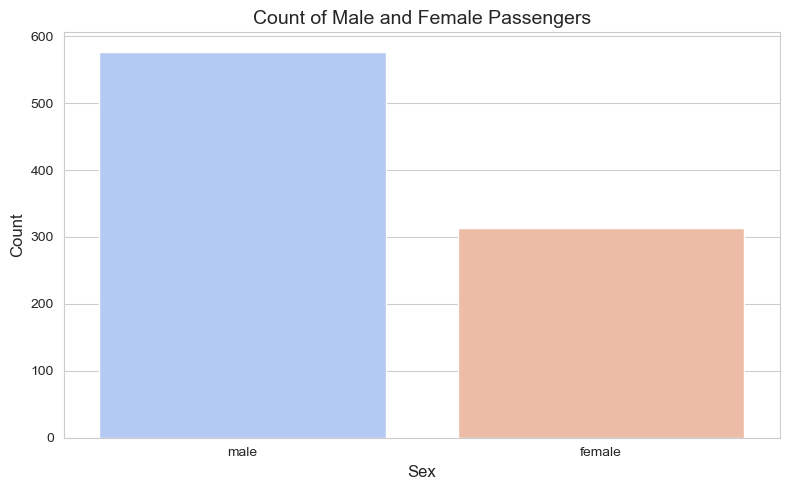

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a different style
sns.set_style("whitegrid")

# Categorical variable: Sex
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Sex'].value_counts().index, y=df['Sex'].value_counts().values, palette="coolwarm")
plt.title('Count of Male and Female Passengers', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


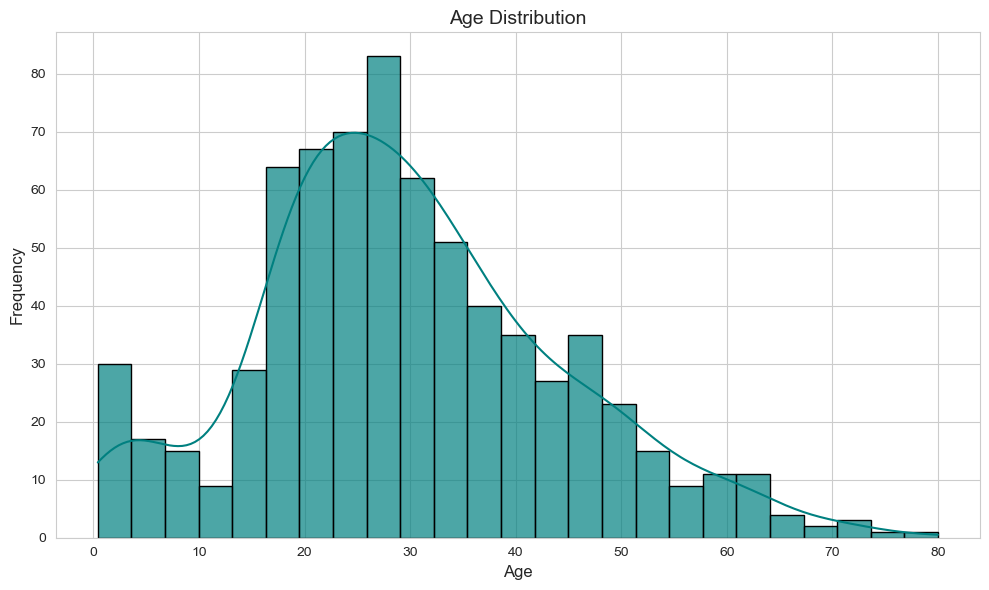

In [16]:
# Numerical variable: Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=25, kde=True, color="teal", edgecolor="black", alpha=0.7)
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

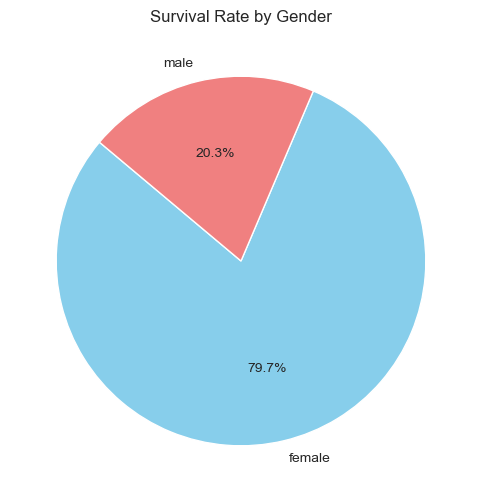

In [17]:
import matplotlib.pyplot as plt

# Pie chart for Survival rate by Gender
gender_survival = df.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.pie(gender_survival, labels=gender_survival.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Survival Rate by Gender')
plt.show()

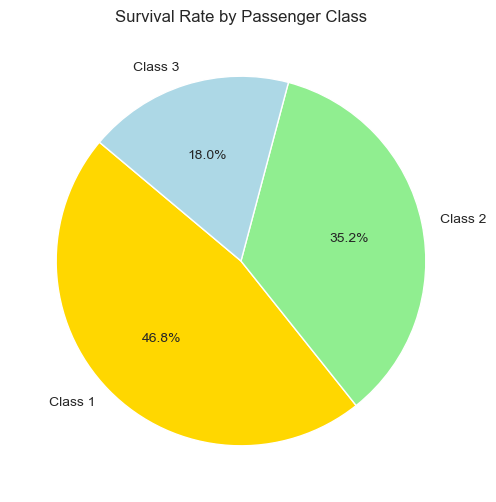

In [18]:
# Pie chart for Survival rate by Passenger Class
pclass_survival = df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.pie(pclass_survival, labels=['Class ' + str(i) for i in pclass_survival.index], 
        autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightblue'])
plt.title('Survival Rate by Passenger Class')
plt.show()


In [19]:

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


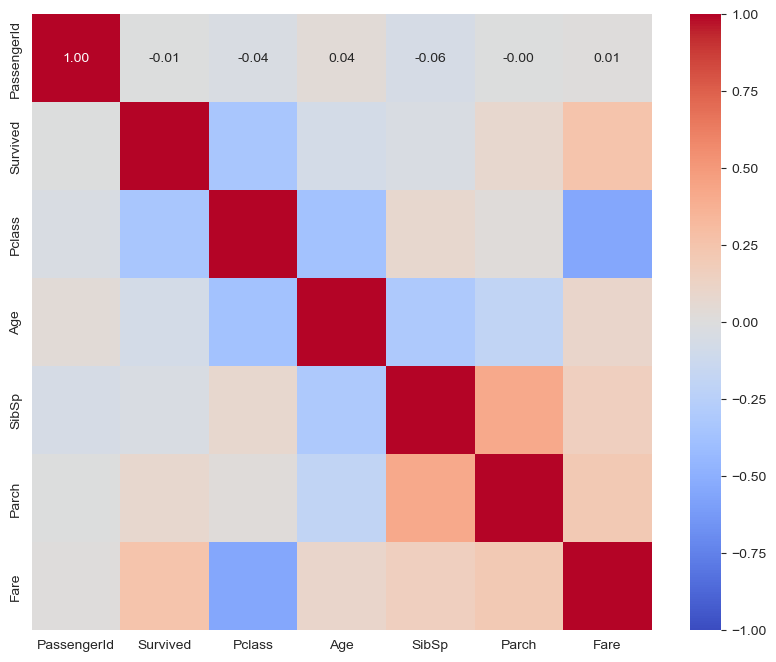

In [20]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.show()

In [21]:
print('This Part For Feature Engineering')

This Part For Feature Engineering


In [22]:
import pandas as pd
titanic_data = pd.read_excel(r"C:\Users\DELL\Desktop\titanic projet\titanic_cleaned.xlsx")


In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,First Name,Last name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.250000,Unknown,3
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,38.0,1,0,PC 17599,71.283302,C85,1
2,3,1,3,Heikkinen,Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.925000,Unknown,3
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.099998,C123,3
4,5,0,3,Allen,Mr. William Henry,1,35.0,0,0,373450,8.050000,Unknown,3


In [24]:
titanic_data.columns = titanic_data.columns.str.strip()

In [25]:
titanic_data['Title'] = titanic_data['First Name'] + ' ' + titanic_data['Last name']
titanic_data['Title'] = titanic_data['Title'].str.extract(r'(\b\w+\.)')  # Extract titles
titanic_data['Title'] = titanic_data['Title'].replace(['Mlle.', 'Ms.', 'Mme.'], 'Miss.')  # Normalize
titanic_data['Title'] = titanic_data['Title'].replace(['Dr.', 'Rev.', 'Col.', 'Major.', 'Capt.', 'Sir.', 'Lady.', 'Don.'], 'Other')  # Group uncommon titles


In [26]:
titanic_data.head()

,PassengerId,Survived,Pclass,First Name,Last name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,Braund,Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.250000,Unknown,3,Mr.
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),0,38.0,1,0,PC 17599,71.283302,C85,1,Mrs.
2,3,1,3,Heikkinen,Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.925000,Unknown,3,Miss.
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.099998,C123,3,Mrs.
4,5,0,3,Allen,Mr. William Henry,1,35.0,0,0,373450,8.050000,Unknown,3,Mr.


In [27]:
# Reorder columns to place Title after First Name
columns = list(titanic_data.columns)
columns.remove('Title')
columns.insert(columns.index('First Name') + 1, 'Title')
titanic_data = titanic_data[columns]

# Print the resulting DataFrame
titanic_data.head()

,PassengerId,Survived,Pclass,First Name,Title,Last name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr.,Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.250000,Unknown,3
1,2,1,1,Cumings,Mrs.,Mrs. John Bradley (Florence Briggs Thayer),0,38.0,1,0,PC 17599,71.283302,C85,1
2,3,1,3,Heikkinen,Miss.,Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.925000,Unknown,3
3,4,1,1,Futrelle,Mrs.,Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.099998,C123,3
4,5,0,3,Allen,Mr.,Mr. William Henry,1,35.0,0,0,373450,8.050000,Unknown,3


In [28]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)

titanic_data.head(10)

,PassengerId,Survived,Pclass,First Name,Title,Last name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,Braund,Mr.,Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.250000,Unknown,3,2,0
1,2,1,1,Cumings,Mrs.,Mrs. John Bradley (Florence Briggs Thayer),0,38.0,1,0,PC 17599,71.283302,C85,1,2,0
2,3,1,3,Heikkinen,Miss.,Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.925000,Unknown,3,1,1
3,4,1,1,Futrelle,Mrs.,Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.099998,C123,3,2,0
4,5,0,3,Allen,Mr.,Mr. William Henry,1,35.0,0,0,373450,8.050000,Unknown,3,1,1
5,6,0,3,Moran,Mr.,Mr. James,1,30.0,0,0,330877,8.458300,Unknown,2,1,1
6,7,0,1,McCarthy,Mr.,Mr. Timothy J,1,54.0,0,0,17463,51.862499,E46,3,1,1
7,8,0,3,Palsson,Master.,Master. Gosta Leonard,1,2.0,3,1,349909,21.075001,Unknown,3,5,0
8,9,1,3,Johnson,Mrs.,Mrs. Oscar W (Elisabeth Vilhelmina Berg),0,27.0,0,2,347742,11.133300,Unknown,3,3,0
9,10,1,2,Nasser,Mrs.,Mrs. Nicholas (Adele Achem),0,14.0,1,0,237736,30.070801,Unknown,1,2,0


In [29]:
titanic_data['Deck'] = titanic_data['Cabin'].str[0]  # Extract the first letter
titanic_data['Deck'] = titanic_data['Deck'].replace('U', 'Unknown')  # Handle unknown values
titanic_data.head()

,PassengerId,Survived,Pclass,First Name,Title,Last name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Deck
0,1,0,3,Braund,Mr.,Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.250000,Unknown,3,2,0,Unknown
1,2,1,1,Cumings,Mrs.,Mrs. John Bradley (Florence Briggs Thayer),0,38.0,1,0,PC 17599,71.283302,C85,1,2,0,C
2,3,1,3,Heikkinen,Miss.,Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.925000,Unknown,3,1,1,Unknown
3,4,1,1,Futrelle,Mrs.,Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.099998,C123,3,2,0,C
4,5,0,3,Allen,Mr.,Mr. William Henry,1,35.0,0,0,373450,8.050000,Unknown,3,1,1,Unknown


In [30]:
import numpy as np

# Age groups
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=[0, 12, 19, 59, np.inf], labels=['Child', 'Teenager', 'Adult', 'Senior'])

# Fare groups
titanic_data['FareGroup'] = pd.qcut(titanic_data['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
titanic_data.head(10)

,PassengerId,Survived,Pclass,First Name,Title,Last name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Deck,AgeGroup,FareGroup
0,1,0,3,Braund,Mr.,Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.250000,Unknown,3,2,0,Unknown,Adult,Low
1,2,1,1,Cumings,Mrs.,Mrs. John Bradley (Florence Briggs Thayer),0,38.0,1,0,PC 17599,71.283302,C85,1,2,0,C,Adult,Very High
2,3,1,3,Heikkinen,Miss.,Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.925000,Unknown,3,1,1,Unknown,Adult,Medium
3,4,1,1,Futrelle,Mrs.,Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.099998,C123,3,2,0,C,Adult,Very High
4,5,0,3,Allen,Mr.,Mr. William Henry,1,35.0,0,0,373450,8.050000,Unknown,3,1,1,Unknown,Adult,Medium
5,6,0,3,Moran,Mr.,Mr. James,1,30.0,0,0,330877,8.458300,Unknown,2,1,1,Unknown,Adult,Medium
6,7,0,1,McCarthy,Mr.,Mr. Timothy J,1,54.0,0,0,17463,51.862499,E46,3,1,1,E,Adult,Very High
7,8,0,3,Palsson,Master.,Master. Gosta Leonard,1,2.0,3,1,349909,21.075001,Unknown,3,5,0,Unknown,Child,High
8,9,1,3,Johnson,Mrs.,Mrs. Oscar W (Elisabeth Vilhelmina Berg),0,27.0,0,2,347742,11.133300,Unknown,3,3,0,Unknown,Adult,Medium
9,10,1,2,Nasser,Mrs.,Mrs. Nicholas (Adele Achem),0,14.0,1,0,237736,30.070801,Unknown,1,2,0,Unknown,Teenager,High


In [31]:
# Save the DataFrame to a CSV file
titanic_data.to_csv('titanic_data.csv', index=False)

In [32]:
pip install pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [34]:
# Label Encoding for 'Title' and 'Sex'
le = LabelEncoder()

# Dr → 1
# Master → 2
# Miss → 3
# Mr → 4
# Mrs → 5

titanic_data['Title'] = le.fit_transform(titanic_data['Title'])
titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

# Check the results
print(titanic_data[['Title', 'Sex']].head())



   Title  Sex
0      4    1
1      5    0
2      3    0
3      5    0
4      4    1


In [35]:
titanic_data.head()

,PassengerId,Survived,Pclass,First Name,Title,Last name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Deck,AgeGroup,FareGroup
0,1,0,3,Braund,4,Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.250000,Unknown,3,2,0,Unknown,Adult,Low
1,2,1,1,Cumings,5,Mrs. John Bradley (Florence Briggs Thayer),0,38.0,1,0,PC 17599,71.283302,C85,1,2,0,C,Adult,Very High
2,3,1,3,Heikkinen,3,Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.925000,Unknown,3,1,1,Unknown,Adult,Medium
3,4,1,1,Futrelle,5,Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.099998,C123,3,2,0,C,Adult,Very High
4,5,0,3,Allen,4,Mr. William Henry,1,35.0,0,0,373450,8.050000,Unknown,3,1,1,Unknown,Adult,Medium


In [36]:
# One-Hot Encoding for categorical features
categorical_columns = [ 'Deck', 'AgeGroup', 'FareGroup']
titanic_data = pd.get_dummies(titanic_data, columns=categorical_columns, drop_first=True)

# Convert only the numeric columns to integers (0 or 1) after One-Hot Encoding
# Select columns that are numeric after One-Hot Encoding
data_numeric = titanic_data.select_dtypes(include=['int64', 'float64'])

# Convert those columns to integers (0 or 1)
data_numeric = data_numeric.astype(int)

# Now, combine with non-numeric columns (e.g., 'Name', 'Ticket', etc.)
data_non_numeric = titanic_data.select_dtypes(exclude=['int64', 'float64'])

# Combine both
final_data = pd.concat([data_non_numeric, data_numeric], axis=1)

# Check the result
print(final_data)

    First Name  Title                                   Last name  \
0       Braund      4                             Mr. Owen Harris   
1      Cumings      5  Mrs. John Bradley (Florence Briggs Thayer)   
2    Heikkinen      3                                 Miss. Laina   
3     Futrelle      5          Mrs. Jacques Heath (Lily May Peel)   
4        Allen      4                           Mr. William Henry   
..         ...    ...                                         ...   
886   Montvila      6                                 Rev. Juozas   
887     Graham      3                        Miss. Margaret Edith   
888   Johnston      3              Miss. Catherine Helen "Carrie"   
889       Behr      4                             Mr. Karl Howell   
890     Dooley      4                                 Mr. Patrick   

               Ticket    Cabin  IsAlone  Deck_B  Deck_C  Deck_D  Deck_E  ...  \
0           A/5 21171  Unknown        0   False   False   False   False  ...   
1          

In [37]:
# Drop columns that are not needed
final_data.drop(['PassengerId', 'First Name', 'Last name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [38]:
final_data.head()

,Title,IsAlone,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_Unknown,...,FareGroup_Very High,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,4,0,False,False,False,False,False,False,False,True,...,False,0,3,1,22,1,0,7,3,2
1,5,0,False,True,False,False,False,False,False,False,...,True,1,1,0,38,1,0,71,1,2
2,3,1,False,False,False,False,False,False,False,True,...,False,1,3,0,26,0,0,7,3,1
3,5,0,False,True,False,False,False,False,False,False,...,True,1,1,0,35,1,0,53,3,2
4,4,1,False,False,False,False,False,False,False,True,...,False,0,3,1,35,0,0,8,3,1


In [39]:
# Save the final_data DataFrame to a CSV file
final_data.to_csv('final_data.csv', index=False)


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Drop any rows with missing values (if any)
clean_data_titanic = final_data.dropna()

# Separate features (X) and target (y)
X = clean_data_titanic.drop(columns=['Survived'])
y = clean_data_titanic['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the accuracy and the table
print(f"Accuracy: {accuracy:.2%}")
report_df


Accuracy: 79.89%


,precision,recall,f1-score,support
0,0.822430,0.838095,0.830189,105.000000
1,0.763889,0.743243,0.753425,74.000000
accuracy,0.798883,0.798883,0.798883,0.798883
macro avg,0.793159,0.790669,0.791807,179.000000
weighted avg,0.798229,0.798883,0.798454,179.000000


                          Model  Accuracy       AUC
0                 Random Forest  0.810056  0.891120
1             Gradient Boosting  0.826816  0.879923
2  Support Vector Machine (SVM)  0.659218  0.813707


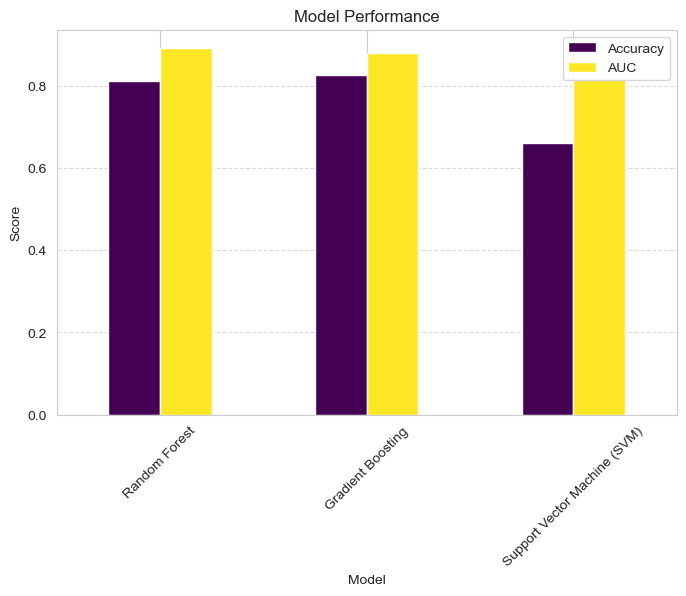

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

# Split the dataset
X = clean_data_titanic.drop('Survived', axis=1)  # Features
y = clean_data_titanic['Survived']              # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine (SVM)": SVC(probability=True)
}

# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results.append({"Model": name, "Accuracy": acc, "AUC": auc})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display as a table
print(results_df)

# Visualization
results_df.plot(x="Model", y=["Accuracy", "AUC"], kind="bar", figsize=(8, 5), colormap="viridis")
plt.title("Model Performance")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [43]:
from sklearn.ensemble import StackingClassifier

# Define base models and stacking classifier
base_models = [
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('svc', SVC(probability=True))
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train stacking model
stacking_model.fit(X_train, y_train)

# Evaluate stacking model
stacking_auc = roc_auc_score(y_test, stacking_model.predict_proba(X_test)[:, 1])
print(f"Stacking Model AUC: {stacking_auc:.4f}")


Stacking Model AUC: 0.8916


In [45]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the stacking model
stacking_scores = cross_val_score(stacking_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Stacking Model Cross-Validation AUC: {stacking_scores.mean():.4f} ± {stacking_scores.std():.4f}")


Stacking Model Cross-Validation AUC: 0.8598 ± 0.0173


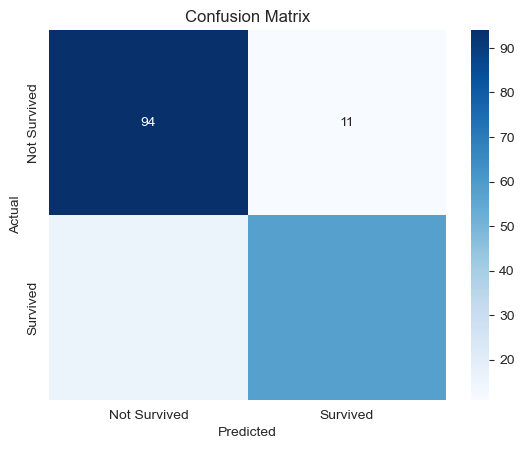

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
y_pred = stacking_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap Visualization
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


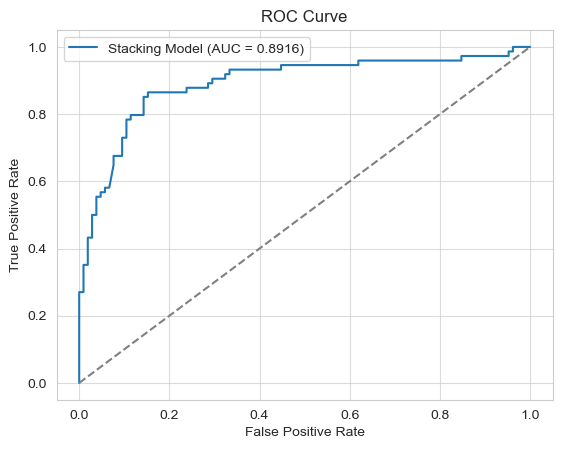

In [47]:
from sklearn.metrics import roc_curve

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, stacking_model.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label=f"Stacking Model (AUC = {stacking_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(alpha=0.7)
plt.show()
